Moteur : http://www.fiches-auto.fr/articles-auto/fonctionnement-d-une-auto/s-1350-savoir-lire-une-fiche-technique.php
Couleur : https://code.peinturevoiture.fr/27595.html

https://benalexkeen.com/mapping-categorical-data-in-pandas/

Chevaux-vapeur: Ch, hp(horsepower), ps
Cheval fiscal: cv

In [75]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import re
%matplotlib inline 
sns.set(color_codes=True)

#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 4)
pd.set_option('max_colwidth', 10000)
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('display.max_rows', None)

# https://regex101.com/
# https://docs.python.org/3/library/re.html

# I. Preprocessing des données

In [76]:
df = pd.read_csv("../Data_cars.csv")

In [77]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M SPORT BVA8, puissance_fiscale: 16, portes: 5.0, options: triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appel d'urgence intelligent;prise 12v additionnelle;sieges advanced pour conducteur et passager avant;projecteurs antibrouillard;climatisation automatique multi zone;pack suspension adaptative;&quotcarbonschwarz&quot metallise;caméra de recul;finition m sport;jantes alu 20&quot;pack innovation;kit fumeurs;rétroviseurs rabattables électriquement;shadow line brillant;information trafic en temps reel rtti (3ans);aide parking;contrôle de pression des pneus;système audio Harman Kardon;surround view;sièges électrique à mémoire;conciergerie (3 ans);fonctions &quotma bmw a distance&quot;pack safety;airbag passager desactivable via la cle;services connecteddrive (bmw online 3 ans + bmw apps);pack M;planche de bord en cuir;info trafic tmc;lave-phares;ciel de pavillon anthracite;services bmw connecteddrive;rétroviseur int. jour/nuit auto;tapis de sol;feux de route anti-eblouissement;pack advanced full led;boulons antivol de roues, couleur: Carbonschwarz metallise"
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC, puissance_fiscale: 47, portes: 5.0, options: banquette arrière 3 places;écran tactile;témoin de bouclage des ceintures av;palettes au volant;volant cuir;régulateur limiteur de vitesse;commande climatisation ar;pack dynamique;cache bagages;sorties d'échappement chromées;affichage tête haute;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vision périphérique (360°);commandes vocales;vitres teintées;GPS;services connectés;prise audio USB;stations de webradio;poignées ton carrosserie;pare-brise thermique;système d'éclairage intelligent;régulateur de vitesse;siège conducteur à mémoire;inserts de porte carbone;rétroviseurs extérieurs à mémoire;carte main libre;jantes alu;siège passager à réglages électriques;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;colonne de direction électr. à mémoire;applications bois noir avec inserts alu;accoudoir central arrière;climatisation automatique multi zone;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;eclairage d'ambiance;toit ouvrant rang 1 entrebaillant;siège passager chauffant;caméra de recul;inserts 

**Model_year : fabrication ou de mise en circulation?**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Price        166695 non-null  float64
 1   Make         166695 non-null  object 
 2   Model        166695 non-null  object 
 3   Model_year   166695 non-null  int64  
 4   Mileage      166695 non-null  object 
 5   Fuel         166695 non-null  object 
 6   Gearbox      166695 non-null  object 
 7   Online       166695 non-null  object 
 8   Description  166695 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


* Pas de données manquantes
* Mileage, Online and Description doivent être netoyé.

In [78]:
df.shape

(166695, 9)

In [79]:
maker_frequency = df['Make'].value_counts(normalize=True)
maker_frequency

RENAULT           0.184109
PEUGEOT           0.156687
CITROEN           0.105636
VOLKSWAGEN        0.067435
BMW               0.056534
                    ...   
SECMA             0.000006
AUTOBIANCHI       0.000006
INTERMECCANICA    0.000006
FISKER            0.000006
BUGATTI           0.000006
Name: Make, Length: 92, dtype: float64

**Faire un réequilibrage de données** ...SMOTE ?

Text(0, 0.5, 'Frequency')

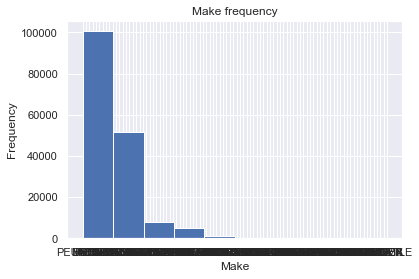

In [80]:
plt.hist(df['Make'])
plt.title('Make frequency')
plt.xlabel('Make')
plt.ylabel('Frequency')

In [167]:
len(df['Make'].unique())

92

# Data cleaning

In [81]:
df['Mileage'] = df['Mileage'].str.replace(".0 km","")
df['Mileage'] = df['Mileage'].astype("int32")
df[['Mileage']].head()

,Mileage
0,94341
1,39051
2,75381
3,92282
4,10


In [82]:
df['Online'] = pd.to_datetime(df['Online'], format='%d/%m/%Y à %Hh%M')

df['Online_date'] = df['Online'].dt.date
df['Online_time'] = df['Online'].dt.time

df['Online_year'] = df['Online'].dt.year
df['Online_month'] = df['Online'].dt.month
df['Online_month_day'] = df['Online'].dt.day
df['Online_hour'] = df['Online'].dt.hour
df['Online_minute'] = df['Online'].dt.minute
df['Online_week_day'] = df['Online'].dt.weekday
df[['Online', 'Online_date', 'Online_time', 'Online_year', 'Online_month', 'Online_month_day', 'Online_hour', 'Online_minute', 'Online_week_day']].head(2)

,Online,Online_date,Online_time,Online_year,Online_month,Online_month_day,Online_hour,Online_minute,Online_week_day
0,2018-07-06 03:47:00,2018-07-06,03:47:00,2018,7,6,3,47,4
1,2018-04-03 16:41:00,2018-04-03,16:41:00,2018,4,3,16,41,1


In [83]:
df['age'] = df['Online_year'] - df['Model_year']

In [84]:
df[['Description']].head(1)

,Description
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"


Description contient plusieurs sous-champs qui sont séparés par une **','**

Le sous-champs Options contient des paramètres séparés par des **';'**

Certains paramètres dans Options contiennent des valeurs spécifiques. 
Leur patern est : **'; parametre : valeur'**. 

Pour les paramettres suivants dans Options : 
- finition brillantes pneus 
- noir anthracite finition brillantes avec pneus
- 5 J x 21 Pneus '
- réglages électriques des sièges -Conducteur

le patern est **', parametre : valeur'**

In [85]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,;]*?:|,[^,;]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
#details = [w.replace(', ', '') for w in details]
#details = [w.replace(':', '') for w in details]
details

{', couleur:',
 ', finition brillantes pneus :',
 ', noir anthracite finition brillantes avec pneus :',
 ', options:',
 ', portes:',
 ', puissance_fiscale:',
 ', réglages électriques des sièges -Conducteur :',
 ', version:',
 ',5 J x 21 Pneus :',
 'modele:'}

In [86]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,; ]*?:|, [^,; ]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
details = [w.replace(', ', '') for w in details]
details = [w.replace(':', '') for w in details]
details

['puissance_fiscale', 'modele', 'portes', 'couleur', 'options', 'version']

In [87]:
df[df['Description'].str.contains("finition brillantes pneus :")]['Description'].head(1)

7213    modele: RS3 (2E GENERATION) SPORTBACK, version: II (2) SPORTBACK 2.5 TFSI 400 QUATTRO S TRONIC, puissance_fiscale: 29, portes: 5.0, options: Rétroviseurs rabattables électriquement;Application décorative Carbone;Système audio carte digitale;Bluetooth inclut musique en streaming, connexion téléphone;Smart card / Smart key;Air conditionné 2 zones;Jantes en aluminium coulé en style Blade à 5 branches en noir anthracite brillant, finition brillantes pneus : 255/30 R19 AV et 235/35 R19 AR (uniquement sur RS 3 Sportback);Palettes au volant;Feux de croisement à LED;Freins régénérateurs;Antipatinage;Limiteur de vitesse;Sorties d'échappement Sport RS pour une sonorité encore plus sportive;Rétroviseurs extérieurs réglables, dégivrants et rabattables électriquement avec position automatique pour manoeuvre de stationnement et fonction jour / nuit automatiquecôté conducteur;Vitres arrière surteintées (Privacy glass);Volant suede & cuir;Alarme;Bang & Olufsen Sound System;Système de navigatio

In [104]:
df['modele'] = df['Description'].str.extract(r'(\bmodele\: \b.*?,)', expand=True) 
df['modele'] = df['modele'].str.replace("modele: ", "")
df['modele'] = df['modele'].str.replace(",", "")

df['version'] = df['Description'].str.extract(r'(\bversion\b.*?,)', expand=True)       
df['version'] = df['version'].str.replace("version: ", "")
df['version'] = df['version'].str.replace(",", "")

df['puissance_fiscale'] = df['Description'].str.extract(r'(\bpuissance_fiscale\: \b.*?,)', expand=True)       
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace("puissance_fiscale: ", "")
df['puissance_fiscale'] = df['puissance_fiscale'].str.replace(",", "")

df['portes'] = df['Description'].str.extract(r'(\bportes\: \b.*?,)', expand=True)       
df['portes'] = df['portes'].str.replace("portes: ", "")
df['portes'] = df['portes'].str.replace(",", "")

df['couleur'] = df['Description'].str.extract(r'(\bcouleur\: \b.*?$)', expand=True)       
df['couleur'] = df['couleur'].str.replace("couleur: ", "")
df['couleur'] = df['couleur'].str.upper()

df['options'] = df['Description'].str.extract(r'(\boptions\b.*, couleur)', expand=True)       
df['options'] = df['options'].str.replace("options: ", "")
df['options'] = df['options'].str.replace(", couleur", "")

In [105]:
df[['Description', 'modele', 'version', 'puissance_fiscale', 'portes', 'couleur', 'options']].head(2)

,Description,modele,version,puissance_fiscale,portes,couleur,options
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE",308 (2E GENERATION),1.6 HDI FAP 92CH BUSINESS 5P,4,5.0,BLANC BANQUISE,banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle
1,"modele: X6 F16, version: (F16) XDRIVE30D 258 M SPORT BVA8, puissance_fiscale: 16, portes: 5.0, options: triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appel d'urgence intelligent;prise 12v additionnelle;sieges advanced pour conducteur et passager avant;projecteurs antibrouillard;climatisation automatique multi zone;pack suspension adaptative;&quotcarbonschwarz&quot metallise;caméra de recul;finition m sport;jantes alu 20&quot;pack innovation;kit fumeurs;rétroviseurs rabattables électriquement;shadow line brillant;information trafic en temps reel rtti (3ans);aide parking;contrôle de pression des pneus;système audio Harman Kardon;surround view;sièges électrique à mémoire;conciergerie (3 ans);fonctions &quotma bmw a distance&quot;pack safety;airbag passager desactivable via la cle;services connecteddrive (bmw online 3 ans + bmw apps);pack M;planche de bord en cuir;info trafic tmc;lave-phares;ciel de pavillon anthracite;services bmw connecteddrive;rétroviseur int. jour/nuit auto;tapis de sol;feux de route anti-eblouissement;pack advanced full led;boulons antivol de roues, couleur: Carbonschwarz metallise",X6 F16,(F16) XDRIVE30D 258 M SPORT BVA8,16,5.0,CARBONSCHWARZ METALLISE,triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appe

In [106]:
df['portes'].value_counts()

5.0    138807
3.0     11597
4.0      8540
2.0      6443
0.0        17
6.0         2
Name: portes, dtype: int64

**0 et 6** des outliers ?

## Champs 'version'

In [113]:
df['version'].value_counts()

(2) 1.2 PURETECH 82 STYLE 5P               799
II (2) 1.2 8V 69 LOUNGE                    686
III 1.2 PURETECH 82 FEEL                   664
IV 1.6 DCI 130 ENERGY INTENS               633
1.6 DCI 130 ENERGY INTENS                  555
                                          ... 
II (2) CABRIOLET D3 XENIUM                   1
1.2 PURETECH 130CH S&S STYLE                 1
V 1.0 71 MADE IN FRANCE                      1
III (2) 1.6 16V 128 GORDINI 5P               1
1.6 T-GDI LUXURY LAUNCH EDITION RED 4X4      1
Name: version, Length: 31463, dtype: int64

In [158]:
df['Cylindree'] = df['version'].str.extract(r'(\d\.\d)', expand=True)

In [168]:
df['Cylindree'].isna().sum()

30110

In [146]:
df['chevaux_vapeur'] = df['version'].str.extract(r'( \d+ |\d+CH| \d+$)', expand=True)

In [147]:
df['chevaux_vapeur']= df['chevaux_vapeur'].str.replace("CH", "")
df['chevaux_vapeur'] = df['chevaux_vapeur'].str.replace(" ", "")
#df['chevaux_vapeur'].astype(int)
df['chevaux_vapeur'].isna().sum()

14872

In [150]:
df[df['chevaux_vapeur'].isna()][['Make', 'version','puissance_fiscale']]

,Make,version,puissance_fiscale
19,TOYOTA,HSD 136H DESIGN,5
23,BMW,(F20) (2) 116DA M SPORT,6
24,JAGUAR,CABRIOLET 4.2 V8 SURALIMENTE BVA6,32
27,BMW,(F20) (2) 118D URBANCHIC 5P,7
43,PORSCHE,3.0 V6 S DIESEL,16
...,...,...,...
166633,PEUGEOT,1.0 TRENDY 2-TRONIC 5P,4
166650,CITROEN,2.0 HDI PACK,5
166653,HYUNDAI,2.9 CRDI PACK LUXE BVA,11
166671,VOLKSWAGEN,COMFORTLINE,7


In [165]:
df['chevaux_vapeur'].unique()

array(['92', '258', '560', '70', '95', '313', '140', '110', '115', '63',
       '90', '116', '125', '75', '82', nan, '205', '180', '150', '120',
       '320', '130', '170', '136', '105', '200', '190', '160', '350',
       '69', '100', '112', '177', '245', '220', '143', '141', '50', '184',
       '181', '124', '37', '85', '270', '155', '135', '122', '68', '165',
       '65', '240', '156', '286', '109', '80', '500', '60', '175', '192',
       '86', '1400', '218', '231', '394', '88', '272', '235', '707',
       '142', '241', '420', '84', '6', '208', '430', '280', '605', '300',
       '197', '211', '265', '182', '207', '204', '132', '2', '106', '250',
       '380', '87', '325', '385', '166', '3', '173', '450', '328', '310',
       '510', '111', '1300', '2015', '256', '262', '355', '134', '163',
       '129', '210', '381', '117', '203', '61', '225', '520', '94', '147',
       '368', '432', '71', '326', '81', '7', '43', '98', '460', '52',
       '152', '4', '275', '230', '405', '330', '1250'

In [142]:
df['version'].str.extract(r'(\d+CV)', expand=True).isna().sum()

0    163838
dtype: int64

In [140]:
df.shape

(166695, 26)

In [117]:
df.loc[df['version']=="IV 1.6 DCI 130 ENERGY INTENS"]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Online_date,...,Online_minute,Online_week_day,age,modele,version,puissance_fiscale,portes,couleur,options,version_number
216,24132.0,RENAULT,SCENIC,2017,14,Diesel,mécanique,2018-07-17 14:34:00,"modele: SCENIC 4, version: IV 1.6 DCI 130 ENERGY INTENS, puissance_fiscale: 7, portes: 5.0, options: écran tactile;témoin de bouclage des ceintures av;radar de recul;volant cuir;régulateur limiteur de vitesse;prises audio auxiliaires;cache bagages;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;miroir surveillance enfant places ar;vitres ar. surteintées;commandes vocales;sièges rang 2 rabattables à plat;système de détection de somnolence;bacs de portes arrière;GPS;services connectés;prise audio USB;6 haut parleurs;poignées ton carrosserie;plafonnier central av et ar à led;système d'éclairage intelligent;régulateur de vitesse;carte main libre;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;projecteurs antibrouillard;accoudoir central arrière;blanc glacier;climatisation automatique multi zone;siège conducteur avec réglage lombaire;vitres électriques;eclairage d'ambiance;caméra de recul;stores de vitres latérales;banquette rabattable;filtre à pollen;interface media;siège passager avec réglage lombaire;tmc;rétroviseurs rabattables électriquement;porte-gobelets avant;répétiteurs de clignotant dans rétro ext;ecran multifonction couleur;aide parking;commande mode eco;AFU;contrôle de pression des pneus;airbags front. + lat.;lampes de lecture à l'arrière;système anti-éblouissement;sièges réglables en hauteur;essuie-glaces automatiques;alerte franchissement ligne;EBD;température extérieure;système Start & Stop;témoin de bouclage ceinture conducteur;système audio;feux automatiques;easy park assist;fermeture électrique;ceinture de vitrage chromée;ESP;tablette arrière;fermeture électrique automatique;bacs de portes avant;boite à gants fermée;toit panoramique;miroir de courtoisie conducteur éclairé;anti patinage;accoudoir central avant;commandes du système audio au volant;rangement sous siège conducteur;fixations ISOFIX;poches d'aumonières;aide au démarrage en côte;lampes de lecture à l'avant;reconnaissance panneaux de signalisation;ordinateur de bord;rétroviseurs dégivrants;volant réglable en hauteur et profondeur;eclairage au sol;siège conducteur réglable hauteur;kit téléphone main libre bluetooth;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;frein de parking automatique;compte tours;pommeau de levier vitesse en cuir;3 ceintures ar. 3 points;siège passager avec dossier repliable;rétroviseur int. jour/nuit auto;système audio carte SD;miroir de courtoisie passager éclairé;banquette coulissante;avertisseur d'angle mort;ouverture des vitres séquentielle, couleur: blanc",2018-07-17,...,34,1,1,SCENIC 4,IV 1.6 DCI 130 ENERGY INTENS,7,5.0,BLANC,écran tactile;témoin de bouclage des ceintures av;radar de recul;volant cuir;régulateur limiteur de vitesse;prises audio auxiliaires;cache bagages;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;miroir surveillance enfant places ar;vitres ar. surteintées;commandes vocales;sièges rang 2 rabattables à plat;système de détection de somnolence;bacs de portes arrière;GPS;services connectés;prise audio USB;6 haut parleurs;poignées ton carrosserie;plafonnier central av et ar à led;système d'éclairage intelligent;régulateur de vitesse;carte main libre;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;projecteurs antibrouillard;accoudoir central arrière;blanc glacier;climatisation automatique multi zone;siège conducteur avec réglage lombaire;vitres électriques;eclairage d'ambiance;caméra de recul;stores de vitres latérales;banquette rabattable;filtre à pollen;interface media;siège passager avec réglage lombaire;tmc;rétroviseurs rabattables électriquement;porte-gobelets avant;répétiteurs de clignotant dans rétro ext;ecran multifonction couleur;aide parki

In [116]:
df['version'].str.extract(r'(\d+CH)', expand=True)

,0
0,92CH
1,NaN
2,NaN
3,NaN
4,NaN
...,...
166690,NaN
166691,NaN
166692,NaN
166693,NaN


## Nettoyage du champs 'options'

In [152]:
#1. options avec quotes
df[df['Description'].str.contains("options: \"")]['options'].head(1)

6    "anti démarrage;radar de recul;prises audio auxiliaires;direction assistée;banquette 1/3 - 2/3;airbags;régulateur de vitesse;phares av. de jour à LED;projecteurs antibrouillard;climatisation automatique multi zone;kit téléphone main libre;rétroviseurs rabattables électriquement;jantes alu 17"";sièges sport;aide parking;sièges réglables en hauteur;carnet d'entretien;système audio carte SD MP3;feux automatiques;anti patinage;fixations ISOFIX;4 vitres électriques;ordinateur de bord;système audio CD;volant réglable en hauteur et profondeur;kit téléphone main libre bluetooth;4 roues motrices;feux et essuie-glaces automatiques;ABS;peinture métallisée;volant multifonctions;détecteur de pluie"
Name: options, dtype: object

In [153]:
# suppression des quotes
df['options'] = df['options'].str.replace("\"", "")

In [154]:
df[df['Description'].str.contains("options: \"")]['options'].head(1)

6    anti démarrage;radar de recul;prises audio auxiliaires;direction assistée;banquette 1/3 - 2/3;airbags;régulateur de vitesse;phares av. de jour à LED;projecteurs antibrouillard;climatisation automatique multi zone;kit téléphone main libre;rétroviseurs rabattables électriquement;jantes alu 17;sièges sport;aide parking;sièges réglables en hauteur;carnet d'entretien;système audio carte SD MP3;feux automatiques;anti patinage;fixations ISOFIX;4 vitres électriques;ordinateur de bord;système audio CD;volant réglable en hauteur et profondeur;kit téléphone main libre bluetooth;4 roues motrices;feux et essuie-glaces automatiques;ABS;peinture métallisée;volant multifonctions;détecteur de pluie
Name: options, dtype: object

In [155]:
#2. options vide
df[df['Description'].str.contains("options: ,")]['Description'].head(1) 

8    modele: C-MAX 2, version: II 1.6 TDCI 115 FAP TITANIUM BVM6, puissance_fiscale: 6, portes: 5.0, options: , couleur: brun
Name: Description, dtype: object

In [156]:
#Replace '' sting with Nan
df['options'].replace('', np.nan, inplace=True)

In [162]:
df[['Description','options']]

,Description,options
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE",banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle
1,"modele: X6 F16, version: (F16) XDRIVE30D 258 M SPORT BVA8, puissance_fiscale: 16, portes: 5.0, options: triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appel d'urgence intelligent;prise 12v additionnelle;sieges advanced pour conducteur et passager avant;projecteurs antibrouillard;climatisation automatique multi zone;pack suspension adaptative;&quotcarbonschwarz&quot metallise;caméra de recul;finition m sport;jantes alu 20&quot;pack innovation;kit fumeurs;rétroviseurs rabattables électriquement;shadow line brillant;information trafic en temps reel rtti (3ans);aide parking;contrôle de pression des pneus;système audio Harman Kardon;surround view;sièges électrique à mémoire;conciergerie (3 ans);fonctions &quotma bmw a distance&quot;pack safety;airbag passager desactivable via la cle;services connecteddrive (bmw online 3 ans + bmw apps);pack M;planche de bord en cuir;info trafic tmc;lave-phares;ciel de pavillon anthracite;services bmw connecteddrive;rétroviseur int. jour/nuit auto;tapis de sol;feux de route anti-eblouissement;pack advanced full led;boulons antivol de roues, couleur: Carbonschwarz metallise",triangle de presignalisation et trousse de premiers secours;volant cuir;pack alu;affichage tête haute;GPS;appel d'urgence intelligent;prise 12v additionnelle;sieges advanced pour conducteur et passager avant;projecteurs antibrouillard;climatisation automatique multi zone;pack suspension adaptative;

### Création de listes d'options

In [32]:
#les option sont séparées par des ';'
df['options'].str.split(";").head(1)

0    [banquette arrière 3 places, volant cuir, cache bagages, airbag frontal, banquette 1/3 - 2/3, sièges rang 2 rabattables à plat, vitres teintées, boucliers av et ar couleur caisse, phares av. de jour à LED, airbags rideaux, rétroviseurs électriques et dégivrants, siège conducteur avec réglage lombaire, vitres électriques, feux de freinage d'urgence, banquette rabattable, feux ar. à LED, AFU, contrôle de pression des pneus, airbags front. + lat., blanc banquise, lampes de lecture à l'arrière, sièges réglables en hauteur, alarme d'oubli d'extinction des feux, EBD, volant sport, température extérieure, système audio, becquet, feux automatiques, fermeture électrique, ESP, fermeture électrique automatique, bacs de portes avant, anti patinage, accoudoir central avant, commandes du système audio au volant, fixations ISOFIX, poches d'aumonières, lampes de lecture à l'avant, lunette arrière dégivrante, essuie-glace arrière, ordinateur de bord, phares halogènes, climatisation, volant réglabl

#### Cas spécifiques
Voir avec le prof si:

'Jantes en aluminium coulé en style Blade à 5 branches en noir anthracite brillant, finition brillantes pneus : 255/30 R19 AV et 235/35 R19 AR (uniquement sur RS 3 Sportback)',

est une seule option

In [33]:
df.iloc[7213]['options_list']

KeyError: 'options_list'

**Utiliser le traitement du texte pour automatiser ????**

In [47]:
#
def func (liste):
    res =[]
    for sublist in liste:
        if isinstance(sublist, list):
            for item in sublist:
                res.append(item) 
        else:
            res.append(sublist)
    #liste = [item for sublist in liste for item in sublist]
    return res
#df['test'] = df['options_list'].apply(lambda x: func(x))

#df.iloc[138747]['test']

## Netoyage du champs Couleur

In [34]:
df['couleur'].value_counts()

GRIS                    20934
BLANC                   20509
NOIR                    18362
ROUGE                    4527
BLEU                     4158
                        ...  
JAUNE / NOIR                1
BRUN MANGARO (METALL        1
NOIRN                       1
NOIR OPAQUE                 1
NOIR MÉTALLIQUE             1
Name: couleur, Length: 6672, dtype: int64

In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
#nltk.download('averaged_perceptron_tagger')

#df['couleur_token'] = df['couleur'].apply(lambda s : word_tokenize(str(s)))
#couleur_token = [item for sublist in df['couleur_token'].tolist() for item in sublist]
#couleur_token = set(couleur_token)

In [36]:
import urllib.request
from bs4 import BeautifulSoup

html = urllib.request.urlopen('http://www.ludowalsh.com/HTM/Liste_de_couleurs.htm').read()

soup = BeautifulSoup(html, 'html.parser')

color_tables = soup.find_all('table', class_="wikitable")
couleurs = []
for table in color_tables:  
    couleurs.append(table.find_all(lambda tag: tag.name == "a"))
    
couleurs = [item for sublist in couleurs for item in sublist]

couleurs_list = []
for item in couleurs:
    groups = re.search(r">.*<", str(item))
    if groups!= None:
        #for group in groups.group():
        couleurs_list.append(groups.group())

couleurs_list = set(couleurs_list)
couleurs_all = []
for item in couleurs_list:
    couleurs_all.append(item.replace('>','').replace('<','').upper())

# ordre suivant le nombre de mots: prévéligier les couleurs composées (plus de choix ... parsemé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=False)
# ordre suivant le nombre de mots: prévéligier les couleurs unique (agrégé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=True)

print("Nombre de couleurs : ",len(couleurs_all))

Nombre de couleurs :  405


In [37]:
def func_couleur(s):
    couleur = np.nan
    for i in range(len(couleurs_all)):
        if couleurs_all[i] in str(s):
            couleur = couleurs_all[i]
    return couleur

df['couleur_dominante'] = df.apply(lambda row : func_couleur(row['couleur']), axis = 1)

In [38]:
df[['couleur','couleur_dominante']]

,couleur,couleur_dominante
0,BLANC BANQUISE,BLANC
1,CARBONSCHWARZ METALLISE,NaN
2,NOIR PANTHERE CRISTAL,NOIR
3,JAUNE,JAUNE
4,BLANC VERNI,BLANC
...,...,...
166690,GRIS FONCE,GRIS
166691,NOIR METAL,NOIR
166692,NOIR,NOIR
166693,GRIS,GRIS


In [39]:
types_peinture =['METAL', 'NACRE', 'CHROME', 'CANDY', 'VERNI', ' MAT', 'UNI', 'OPAQE', 'CRISTAL']

def func_type_peinture(s):
    type_ = np.nan
    for t in types_peinture:
        if t in str(s):
            type_ = t
    return type_

df['couleur_type_peinture'] = df.apply(lambda row : func_type_peinture(row['couleur']), axis = 1)

In [40]:
#df.loc[df['couleur'].isna(),'couleur'] = ''
df[df['couleur'].str.contains('CRISTAL')]['couleur'].value_counts()

ValueError: cannot mask with array containing NA / NaN values

In [41]:
df['couleur_type_peinture'].isna().sum()

132891

## Trasformation de données

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1).copy()
y = df['Price'].values.copy() # prices in R$

# generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# categorical features
cat_ft = ['Gearbox', 'Fuel', 'Model', 'Make']

# run once on full dataset to get all category values
temp = ColumnTransformer([('cat', OneHotEncoder(), cat_ft)]).fit(X)
cats = temp.named_transformers_['cat'].categories_

cat_tr = OneHotEncoder(categories=cats, sparse=False)

# numerical features
num_ft = ['puissance_fiscale', 'Mileage', 'Model_year', 'age']
num_tr = StandardScaler()
#num_tr = FunctionTransformer(func=None)

# data transformer
data_tr = ColumnTransformer([('num', num_tr, num_ft), ('cat', cat_tr, cat_ft)])

#Mean absolute percentage error (MAPE)


In [179]:
type(data_tr)

sklearn.compose._column_transformer.ColumnTransformer

In [44]:
df['couleur_dominante'] = df['couleur_dominante'].astype("category").cat.codes
df['couleur_type_peinture'] = df['couleur_type_peinture'].astype("category").cat.codes

In [69]:
df['Gearbox'].value_counts()

mécanique      113014
automatique     53681
Name: Gearbox, dtype: int64

In [70]:
df['Gearbox'] = df['Gearbox'].astype("category").cat.codes
df['Gearbox'].value_counts()

1    113014
0     53681
Name: Gearbox, dtype: int64

In [67]:
df['Fuel'].value_counts()

Diesel                              109446
Essence                              53392
Hybride essence électrique            2725
Electrique                             704
Hybride diesel électrique              310
Bicarburation essence GPL               96
Bicarburation essence bioéthanol        21
Bicarburation essence GNV                1
Name: Fuel, dtype: int64

https://achat-voiture.ooreka.fr/astuce/voir/634491/bicarburation-essence-gpl

In [71]:
df['Fuel'] = df['Fuel'].astype("category").cat.codes
df['Fuel'].value_counts()

3    109446
5     53392
7      2725
4       704
6       310
1        96
2        21
0         1
Name: Fuel, dtype: int64

In [73]:
df['Model'].value_counts()

CLIO         7967
308          6123
208          6053
MEGANE       5212
CAPTUR       4410
             ... 
550             1
K5 BLAZER       1
400             1
504             1
SC              1
Name: Model, Length: 846, dtype: int64

In [74]:
df['Model'] = df['Model'].astype("category").cat.codes
df['Model'].value_counts()

251    7967
46     6123
31     6053
507    5212
213    4410
       ... 
677       1
805       1
422       1
678       1
441       1
Name: Model, Length: 846, dtype: int64

## Valeurs extrême

In [92]:
df['puissance_fiscale'].isna().sum()

0

## Valeur manquantes

## Dataset spletting

Les features à utiliser : 
* Model
* Mileage
* Fuel
* Gearbox
* Model_year
* Make
* portes
* puissance_fiscale

In [97]:
input_features = ['Model', 'Mileage', 'Fuel', 'Gearbox', 'Model_year', 'puissance_fiscale']
X = df[input_features].copy()
y = df['Price']

In [99]:
X_train.shape, X_test.shape

((111685, 6), (55010, 6))

## Comparaison des modèles

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
## inspéré de : https://angelosalton.github.io/2019/01/29/predicting-car-prices-with-scikit-learn.html
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
from sklearn.pipeline import Pipeline#, FeatureUnion
from sklearn import metrics

models = [DummyRegressor(),
          KNeighborsRegressor(),
          linear_model.LinearRegression(), # ommited because of negative scores
          linear_model.Lasso(),
          linear_model.Ridge(),
          linear_model.ElasticNet(),
          ensemble.GradientBoostingRegressor(),
          ensemble.RandomForestRegressor(),
          ensemble.ExtraTreesRegressor()]

models_names = ['Dummy','K-nn',
                'LinearRegres',
                'Lasso','Ridge','Elastic','Boost','Forest','Extra']


In [48]:
mape = []

for model in models:
    pipe = Pipeline([
    ('features', data_tr),
    ('model', model)
    ])
    fits = pipe.fit(X_train,y_train)
    mape.append(mean_absolute_percentage_error(y_test, fits.predict(X_test)))



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5877059109.166016, tolerance: 3571539745.5676055
  positive)


In [50]:
result = pd.DataFrame(data=list(zip(models_names, mape)), columns=['model', 'mape'])
result

,model,mape
0,Dummy,1.260230e+02
1,K-nn,2.495647e+01
2,LinearRegres,5.872732e+08
3,Lasso,5.074189e+01
4,Ridge,5.029392e+01
5,Elastic,7.406347e+01
6,Boost,3.429634e+01
7,Forest,2.332951e+01
8,Extra,2.373786e+01


Text(0, 0.5, 'Mean absolute percentage error')

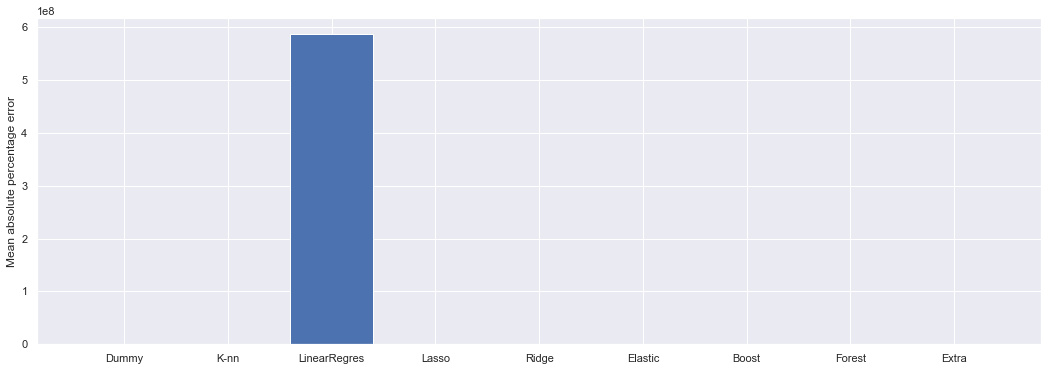

In [69]:
#result.plot.bar(x='model', y='mape', rot=0)#, rot=0
f, ax = plt.subplots(ncols=1, sharex=True, sharey=False, figsize=(18,6))
ax.bar(result['model'], result['mape'])
ax.set_ylabel('Mean absolute percentage error')

Text(0, 0.5, 'Mean absolute percentage error')

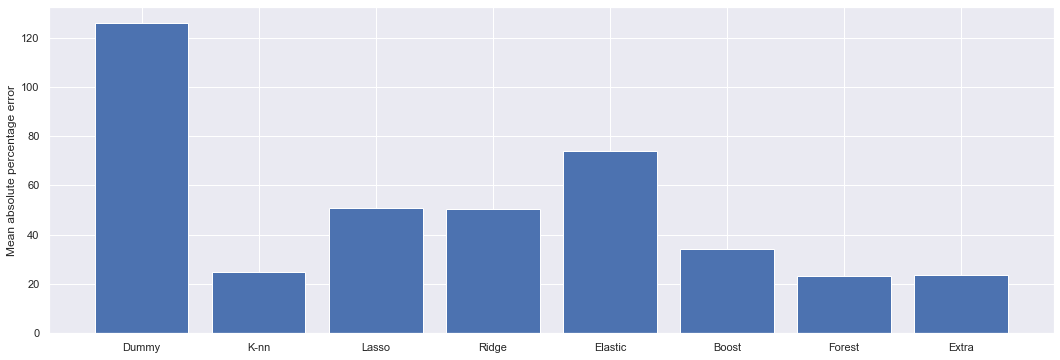

In [70]:
f, ax = plt.subplots(ncols=1, sharex=True, sharey=False, figsize=(18,6))
ax.bar(result.loc[result['model']!='LinearRegres']['model'], result.loc[result['model']!='LinearRegres']['mape'])
ax.set_ylabel('Mean absolute percentage error')
#result.loc[result['model']!='LinearRegres'].plot.bar(x='model', y='mape', rot=0)

Nous remarquons que le meilleur score est donné par le modèle Extra suivi de Random forest. Alors que  

In [142]:
model = ensemble.RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.14)


In [143]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Amélioration du modèle selectionné

## Entrainement du modèle final

In [144]:
pred = model.predict(X_test)

In [145]:
pred = pd.DataFrame.from_dict({'predicted':pred, 'true':y_test})
pred['difference'] = pred.predicted - pred.true
pred
pred['difference'].sum()

,predicted,true,difference
51504,6729.170000,7942.0,-1212.830000
18650,9755.810000,8936.0,819.810000
101152,10561.050000,11651.0,-1089.950000
63336,18728.030000,18206.0,522.030000
136178,8809.440000,8102.0,707.440000
...,...,...,...
38775,19342.930000,16287.0,3055.930000
158408,11603.450000,11393.0,210.450000
81665,9035.290000,7539.0,1496.290000
71902,11945.890000,9405.0,2540.890000


In [146]:
pred['difference'].sum()

2083276.4351860587

In [147]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.22 (+/- 0.06)


In [148]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [149]:
pred = model.predict(X_test)

In [150]:
pred = pd.DataFrame.from_dict({'predicted':pred, 'true':y_test})
pred['difference'] = pred.predicted - pred.true
pred


,predicted,true,difference
51504,6415.8,7942.0,-1526.2
18650,15070.6,8936.0,6134.6
101152,10384.6,11651.0,-1266.4
63336,18651.6,18206.0,445.6
136178,7807.0,8102.0,-295.0
...,...,...,...
38775,15527.6,16287.0,-759.4
158408,23709.0,11393.0,12316.0
81665,21079.2,7539.0,13540.2
71902,13116.0,9405.0,3711.0


In [151]:
pred['difference'].sum()

-32303189.399999995

In [421]:
#df['parametres'].apply(lambda x : type(x))#.str.replace(')
#df['parametres']#.values.replace(',','n')
#df['parametres'] 
df[df['Description'].str.contains(",5 J x 21 Pneus :")]['options_list'].head(1)

81354    [Peinture métallisée, Alarme antivol, Rétroviseurs rabattables électriquement, Fermerture électrique du coffre, Système audio carte digitale, Bluetooth inclut musique en streaming, connexion téléphone, Rétroviseurs extérieurs chauffants, Pack Assistance Stationnement, Smart card / Smart key, Audi park assist, Palettes au volant, Taille écran multi-fonctions 7 pouces, Feux de croisement à LED, Jantes en aluminium coulé style 5 branches doubles en V (style S), gris contrasté, partiellement polies 8,5 J x 21 Pneus : 255/40 R 21, Freins régénérateurs, Antipatinage, Limiteur de vitesse, Pack Éclairage d'ambiance (en plus du pack Éclairage [QQ1]), Système de navigation info trafic, Adaptive cruise control, Chargeur 1 CD, Tapis de sol, Eléments de commande en cuir Audi exclusive, Affichage tête haute, Indicateur de sous-gonflage des pneus, Siège avant chauffant, Étriers de frein peints en rouge à l'avant et à l'arrière avec inscription S, Ouverture du coffre à distance, Accoudoir cen

In [1]:
df[df['Description'].str.contains("pneus :")]['Description'].head(1)

NameError: name 'df' is not defined

In [143]:
df.iloc[81354]['options_list']

['Peinture métallisée',
 'Alarme antivol',
 'Rétroviseurs rabattables électriquement',
 'Fermerture électrique du coffre',
 'Système audio carte digitale',
 'Bluetooth inclut musique en streaming, connexion téléphone',
 'Rétroviseurs extérieurs chauffants',
 'Pack Assistance Stationnement',
 'Smart card / Smart key',
 'Audi park assist',
 'Palettes au volant',
 'Taille écran multi-fonctions 7 pouces',
 'Feux de croisement à LED',
 'Jantes en aluminium coulé style 5 branches doubles en V (style S), gris contrasté, partiellement polies 8,5 J x 21 Pneus : 255/40 R 21',
 'Freins régénérateurs',
 'Antipatinage',
 'Limiteur de vitesse',
 "Pack Éclairage d'ambiance (en plus du pack Éclairage [QQ1])",
 'Système de navigation info trafic',
 'Adaptive cruise control',
 'Chargeur 1 CD',
 'Tapis de sol',
 'Eléments de commande en cuir Audi exclusive',
 'Affichage tête haute',
 'Indicateur de sous-gonflage des pneus',
 'Siège avant chauffant',
 "Étriers de frein peints en rouge à l'avant et à l'arr